## Cas pratique 1 : données de température d'ECCC

Nous avons pris en main dans les sections précédentes la librairie Pandas qui nous a permis de traiter et de manipuler des jeux de données. En combinant ceci avec les librairies Datetime et Matplotlib de Python, nous avons pu visualiser rapidement nos données.  

Nous allons continuer de découvrir les fonctionnalités de ces librairies dans un cas pratique en analysant les données journalières de températures enregitrées par l'une des stations d'Environnement et Changements Climatiques Canada située à Montréal/McTavish entre la période 1948 et 2017. 

Pour compléter et enrichir notre analyse, une nouvelle librairie Python sera présentée:  <b>Seaborn</b>.

- la librairie Seaborn est basée sur matplotlib. 
- elle permet de tracer des graphiques plus complexes

Pour plus d'informations: 

https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html

Ce lien présente une galerie des types de graphique pour être réaliser avec Seaborn: 
https://seaborn.pydata.org/examples/index.html



### 1- Ouverture et lecture de notre série temporelle

In [1]:
% matplotlib inline 
import numpy as np
import pandas as pd
import datetime
from datetime import date
import numpy as np 
df = pd.DataFrame()

# Ouverture du fichier text  
with open('./data/MONTREAL_tasmoy_1948_2017.txt', 'r') as file:
     rows = file.read()
data_EC_Montreal = [float(row) for row in rows.split()]

Nous avons crée un champs unidirectionnel mais nous avons aucune information temporelle dans notre fichier. 
Sachant que notre enregistrement couvre la période 1948 - 2017 , nous allons formater nos dates avec le module <b>datetime</b> de Python. 

In [2]:
# Nous savons que la série temporelle commence le 1er janvier 1948 et se termine le 31 décembre 2017 inclusivement
# Nous pouvons reconstruire l'index des Dataframes formaté en objets DateTime.
start = date(1948, 1, 1)
end = date(2017, 12, 31)
delta=(end-start) 
nb_days = delta.days + 1 
rng = pd.date_range(start, periods=nb_days, freq='D')

# On va utliser l'objet datetime comme index de notre DataFrame
df['datetime'] = rng
df.index = df['datetime'] 

df['Temperature Montreal'] = data_EC_Montreal
df.head()

,datetime,Temperature Montreal
datetime,,
1948-01-01,1948-01-01,-12.0
1948-01-02,1948-01-02,-8.9
1948-01-03,1948-01-03,-3.4
1948-01-04,1948-01-04,-3.4
1948-01-05,1948-01-05,-3.1


In [3]:
#dir(df) # la fonction dir() permet de lister les fonctions qui sont applicables à notre objet DataFrame

Nous avons assigné notre série temporelle dans un DataFrame de Pandas puis nous avons formater la date sous forme d'objet Datetime. 

Il est maintenant facile de manipuler le jeu de données et d'appliquer quelques fonctions simples.  

### 2- Calcul d'indices sur les données de température 

- On va développer et appliquer une fonction pour calculer les quantiles de notre distribution

- En rééchantillonnant notre série avec la méthode <b>.resample()</b> de Pandas, nous verrons comment appliquer des fonctions natives de numpy et appliquer notre propre fonction.

In [4]:
# Création de notre indice qui calcule le quantile de la distribution
# On utilise la fonction .percentile() de numpy
def percentile(n):
    def percentile_(x):
        return np.nanpercentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_         

- Les méthodes <b>.resample()</b> et <b>.agg()</b> de Pandas 

La méthode <b>.resample()</b> est très utile pour la conversion de fréquence et le rééchantillonnage des séries chronologiques. L'objet (ici DataFrame) doit avoir un index de type data/heure (DatetimeIndex) pour pouvoir être utiliser.
Plusieurs fréquences de rééchantillonnage sont mises à disposition (horaire, semaine, mois, saison, année...)

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.resample.html


La méthode <b>.agg()</b> est utilisée pour l'aggrégation des données suivant une liste de fonctions à appliquer à chaque colonne, ce qui produit un résultat aggrégé avec un index hiérarchique.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html

Dans notre exemple, on va rééchantilloner notre jeu de données par mois et calculer pour chaque mois la moyenne, le minimum, le maximum et les 90ème et 95ème quantiles.

In [5]:
resamp_Montreal = df.resample('M').agg([np.mean, np.min, np.max, percentile(90), percentile(95)])
resamp_Montreal.head()

D:\Utilisateurs\guillaume\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4033: RuntimeWarning: All-NaN slice encountered
  r = func(a, **kwargs)


Temperature Montreal                                        
                           mean  amin  amax percentile_90 percentile_95
datetime                                                               
1948-01-31           -10.990323 -23.4  -3.1         -3.60         -3.40
1948-02-29            -9.586207 -20.8   3.6         -2.64         -0.32
1948-03-31            -2.461290 -17.8   7.5          5.60          6.40
1948-04-30             6.640000  -1.7  14.5         12.08         13.13
1948-05-31            12.664516   6.7  21.7         16.70         18.35

In [6]:
resamp_Montreal = resamp_Montreal.loc[:,'Temperature Montreal'] 
resamp_Montreal.head() # simple étape pour supprimer le nom de la colonne 'Temperature Montreal'

,mean,amin,amax,percentile_90,percentile_95
datetime,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40
1948-04-30,6.640000,-1.7,14.5,12.08,13.13
1948-05-31,12.664516,6.7,21.7,16.70,18.35


### 3- Quelques exemples de graphiques avec la librairie Seaborn

Maintenant que nous avons calculer quelques statistiques sur notre DataFrame, nous allons utiliser la librairie Seaborn de Python. 


<img src="./seaborn.png" alt="Seaborn" width="60%" height="70%">


- Exemple: Heatmap

https://seaborn.pydata.org/generated/seaborn.heatmap.html


On voudrait par exemple observer la variation de la température moyenne meuselle pour tous les mois de l'année et toutes les années. On va pour cela définir deux nouvelles colonnes dans notre DataFrame dans lesquelles seront assignées uniquement les années et les mois respectivement. 

In [7]:
resamp_Montreal['year']  = resamp_Montreal.index.year
resamp_Montreal['MonthNo'] = resamp_Montreal.index.month

In [8]:
resamp_Montreal.head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo
datetime,,,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40,1948,1
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32,1948,2
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40,1948,3
1948-04-30,6.640000,-1.7,14.5,12.08,13.13,1948,4
1948-05-31,12.664516,6.7,21.7,16.70,18.35,1948,5


- La méthode <b>.pivot_table()</b>: cette méthode permet de croiser des tableaux dynamiquement . 

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

On voudrait visualiser uniquement les températures moyennes mensuelles, donc travailler avec la colonne 'mean', mettre les année en Index et avoir un mois par colonne.  La méthode <b>.pivot_table()</b> nous permet d'effectuer cette opération. 

In [9]:
Montreal_pivot = resamp_Montreal.pivot_table(values='mean',index='year',columns=['MonthNo'])
Montreal_pivot.head()

MonthNo,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
1948,-10.990323,-9.586207,-2.461290,6.640000,12.664516,17.746667,21.490323,21.106452,17.150000,9.100000,5.983333,-2.522581
1949,-5.774194,-5.692857,-2.196774,7.516667,13.512903,20.560000,22.870968,21.545161,14.620000,12.025806,-0.193333,-3.219355
1950,-5.348387,-9.796429,-4.893548,4.710000,14.116129,18.956667,21.325806,19.112903,13.616667,10.100000,3.956667,-4.835484
1951,-7.354839,-6.485714,-0.490323,7.296667,14.409677,18.270000,21.312903,18.667742,15.133333,10.370968,0.180000,-5.312903
1952,-7.803226,-5.272414,-0.987097,7.996667,12.406452,19.600000,23.080645,20.732258,16.030000,7.674194,3.656667,-3.183871


On applique enfin la fonction <b>.heatmap()</b> sur notre DataFrame. 

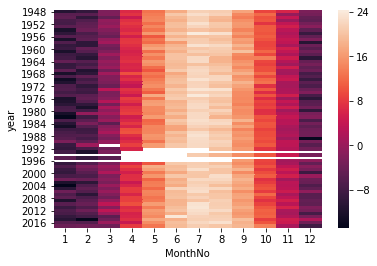

In [10]:
import seaborn as sns 
import matplotlib.pyplot as plt  
sns.heatmap(Montreal_pivot)
plt.show()

On peut améliorer notre affichage.

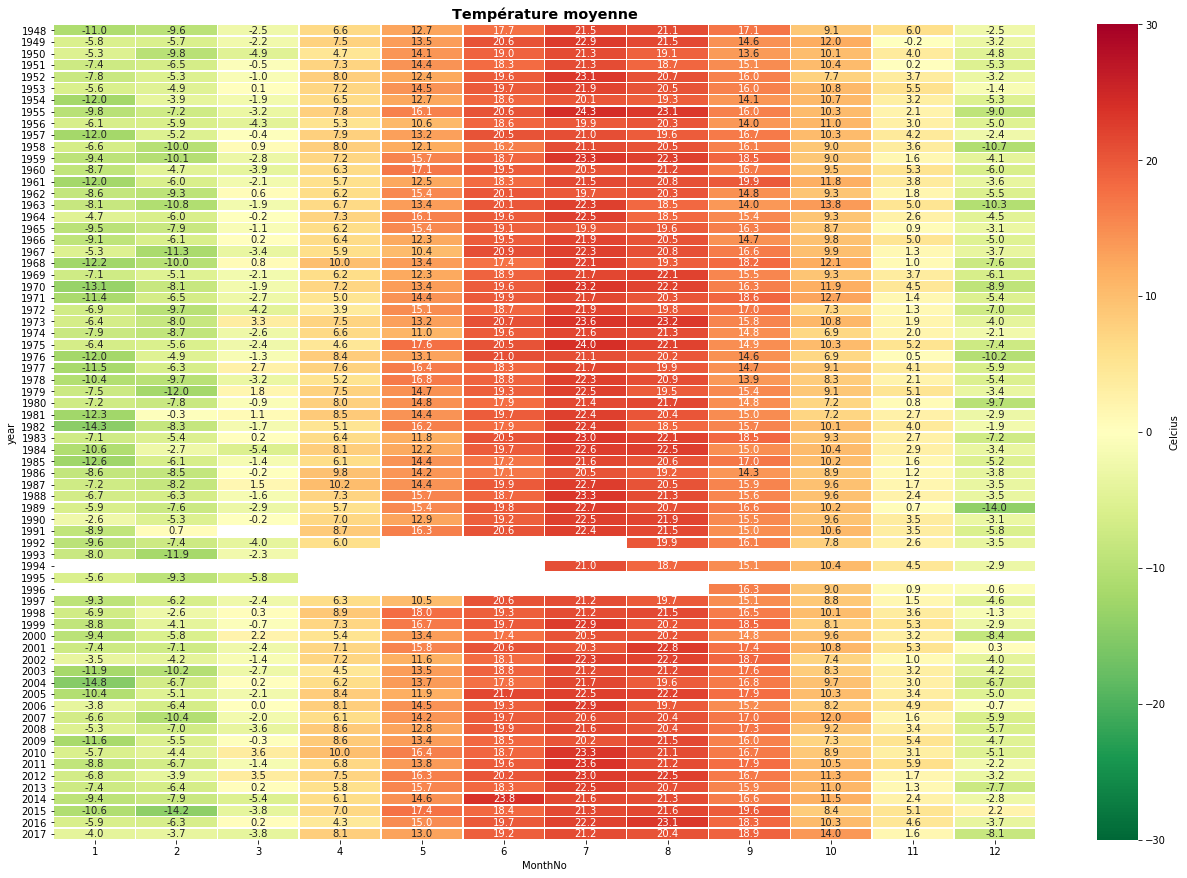

In [11]:
ax = plt.axes()
sns.heatmap(Montreal_pivot, cmap='RdYlGn_r', linewidths=0.5, annot=True , ax = ax,vmin=-30, vmax=30,center=0, fmt='.1f',yticklabels=True, cbar_kws={'label': 'Celcius'})
ax.set_title('Température moyenne', weight='bold', fontsize="x-large")
figure = ax.get_figure()    
figure.set_size_inches(22, 15) 
plt.show()

- Autres exemples de graphiques: Boxplot,  violin plot, line plot 

https://seaborn.pydata.org/generated/seaborn.boxplot.html

https://seaborn.pydata.org/generated/seaborn.violinplot.html

https://seaborn.pydata.org/generated/seaborn.lineplot.html

Dans un premier temps, on crée une nouvelle variable contenant les mois mais en chaîne de caractères. Pour cela on applique la méthode <b>.strftime()</b> de datetime. 

In [12]:
resamp_Montreal['month'] = resamp_Montreal.index.strftime("%b")

In [13]:
resamp_Montreal.head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo,month
datetime,,,,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40,1948,1,Jan
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32,1948,2,Feb
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40,1948,3,Mar
1948-04-30,6.640000,-1.7,14.5,12.08,13.13,1948,4,Apr
1948-05-31,12.664516,6.7,21.7,16.70,18.35,1948,5,May


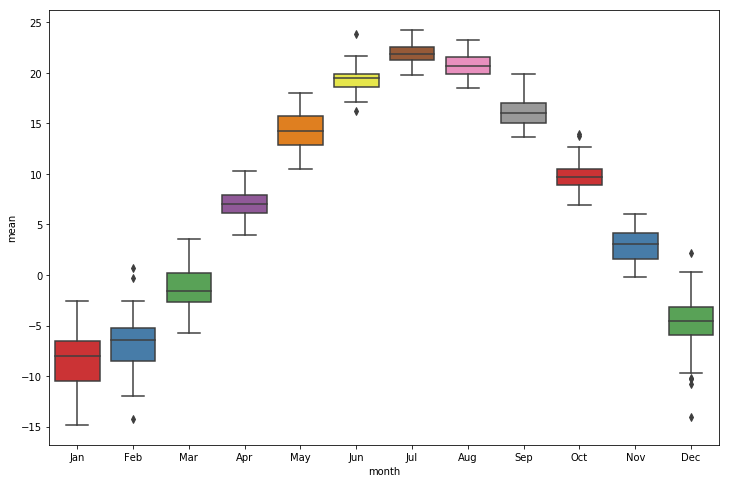

In [14]:
ax = plt.axes()
sns.boxplot(x="month", y="mean", data=resamp_Montreal, palette="Set1")  
figure = ax.get_figure()    
figure.set_size_inches(12, 8) 
plt.show()

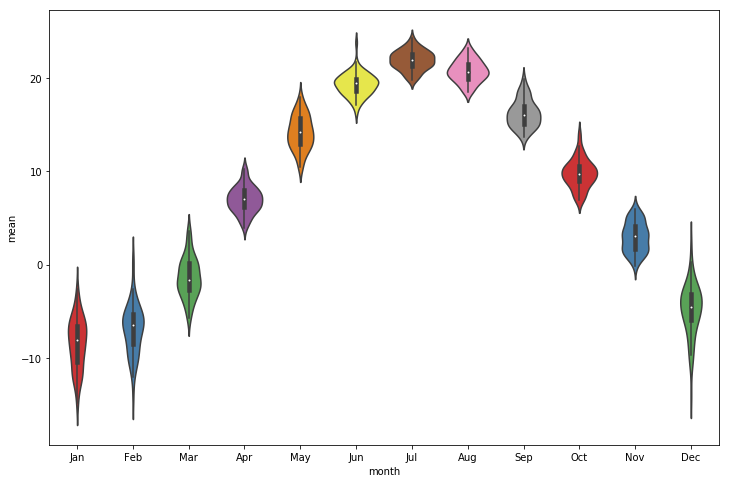

In [15]:
ax = plt.axes()
sns.violinplot(x="month", y="mean", data=resamp_Montreal, palette="Set1")  
figure = ax.get_figure()    
figure.set_size_inches(12, 8)
plt.show()

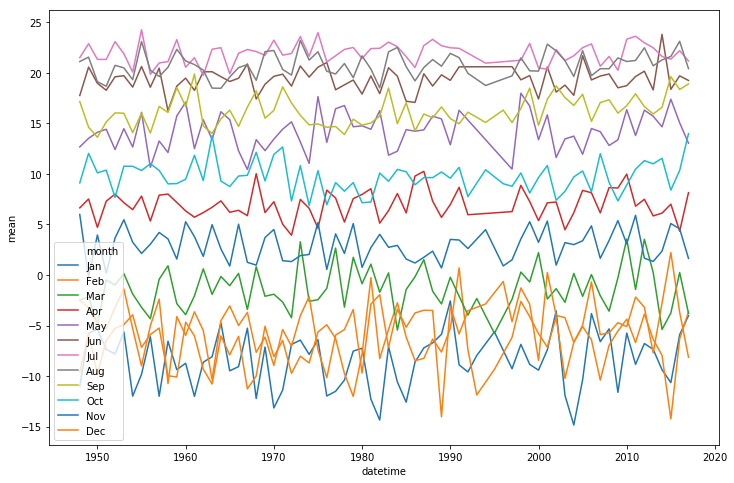

In [16]:
ax = plt.axes()
sns.lineplot(x=resamp_Montreal.index.year, y="mean",
             hue="month",
             data=resamp_Montreal,
             palette="tab10")
figure = ax.get_figure()    
figure.set_size_inches(12, 8)
plt.show()

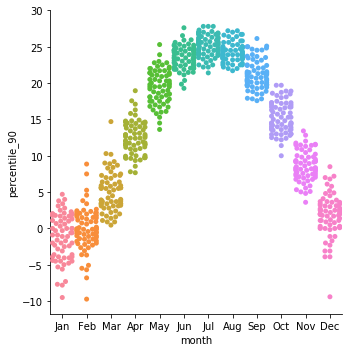

In [17]:
sns.catplot(x="month", y="percentile_90", data=resamp_Montreal, kind="swarm")
plt.show()

- On peut combiner plusieurs graphiques Seaborn:

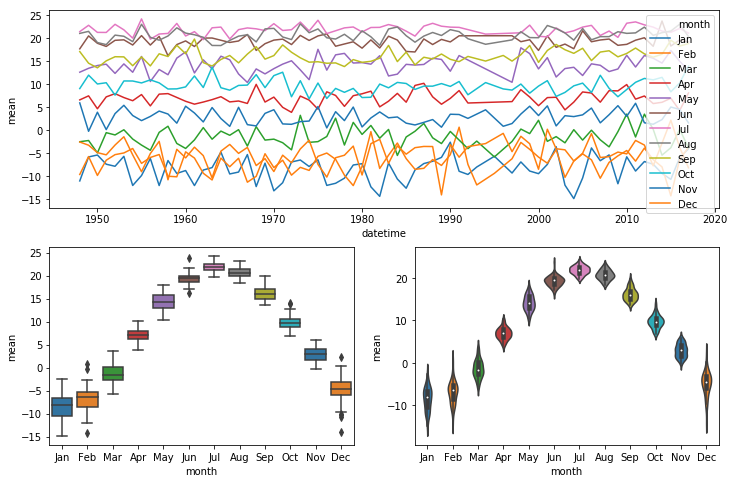

In [18]:
ax = plt.axes()
ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
sns.lineplot(x=resamp_Montreal.index.year, y="mean", hue="month", data=resamp_Montreal, palette="tab10")
ax2 = plt.subplot2grid((2, 2), (1, 0), colspan=1)
sns.boxplot(x="month", y="mean", data=resamp_Montreal, palette="tab10") 
ax3 = plt.subplot2grid((2, 2), (1, 1), colspan=1)
sns.violinplot(x="month", y="mean", data=resamp_Montreal, palette="tab10") 
figure = ax.get_figure()    
figure.set_size_inches(12, 8) 
plt.show()

### 4- Fonction groupby

Nous avons vu dans un notebook précédent la méthode <b>.groupby()</b> de Pandas.

https://www.tutorialspoint.com/python_pandas/python_pandas_groupby.htm

Cette méthode est très utile en la combinant avec des objets datetime.

Reprenons notre dataframe rééchantillonné précédemment. 


In [19]:
resamp_Montreal.head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo,month
datetime,,,,,,,,
1948-01-31,-10.990323,-23.4,-3.1,-3.60,-3.40,1948,1,Jan
1948-02-29,-9.586207,-20.8,3.6,-2.64,-0.32,1948,2,Feb
1948-03-31,-2.461290,-17.8,7.5,5.60,6.40,1948,3,Mar
1948-04-30,6.640000,-1.7,14.5,12.08,13.13,1948,4,Apr
1948-05-31,12.664516,6.7,21.7,16.70,18.35,1948,5,May


On souhaiter grouper notre dataframe par mois avec la méthode <b>.groupeby()</b>

In [20]:
resamp_Montreal_grouped  = resamp_Montreal.groupby("month") 
#resamp_Montreal_grouped.groups     # Pour voir les groupes

- Pour itérer à travers les groupe: 

In [21]:
#for MonthNo,group in resamp_Montreal_grouped :                              
#    print(MonthNo)
#    print(group)
    

- Pour sélectionner un groupe: méthode get_group() 

In [22]:
# nous avons groupé notre DataFrame par mois suivant l'index "month"
# la méthode .get_group() nous permet de sélectionner tout le sous-groupe correspondant. 
resamp_Montreal_grouped.get_group('Dec').head()

,mean,amin,amax,percentile_90,percentile_95,year,MonthNo,month
datetime,,,,,,,,
1948-12-31,-2.522581,-15.0,7.0,2.2,3.90,1948,12,Dec
1949-12-31,-3.219355,-13.9,8.9,5.8,6.70,1949,12,Dec
1950-12-31,-4.835484,-23.4,3.9,0.0,1.95,1950,12,Dec
1951-12-31,-5.312903,-19.2,13.1,7.0,11.15,1951,12,Dec
1952-12-31,-3.183871,-17.0,7.8,2.0,4.60,1952,12,Dec


- Aggrégation: Une fonction agrégée renvoie une seule valeur agrégée pour chaque groupe. 

Une fois le groupe créé, plusieurs opérations d'aggrégation peuvent être effectuées sur les données groupées.


In [23]:
# On va cacluler la moyenne de la variable 'percentile_90' pour chaque groupe. 
resamp_Montreal_grouped['percentile_90'].agg(np.mean)

month
Apr    12.434848
Aug    24.283582
Dec     1.790000
Feb    -0.098529
Jan    -1.046324
Jul    25.119242
Jun    23.557385
Mar     5.021493
May    19.483846
Nov     8.615147
Oct    15.280294
Sep    21.236765
Name: percentile_90, dtype: float64

In [24]:
#resamp_Montreal_grouped['percentile_90'].agg(np.size)

### 5- Cas pratique: 

On va calculer la climatologie mensuelle (1981-2010) de la température moyenne pour chaque mois  et calculer ensuite l'anomalie inter-annuelle de l'ensemble de la série


### 1- Calcul de la climatologie 1981-2010

#### Méthode 1 :  on groupe par mois et on applique une  fonction avec la méthode .apply() sur la colonne 'year' 

In [25]:
grouped  = resamp_Montreal.groupby("MonthNo") 
#grouped.groups

La méthode <b>.apply()</b> nous perment d'appliquer une fonction lambda pour filtrer nos données entre 1981 et 2010 sur la colonne/ variable 'year'  et appliquer une simple moyenne sur la série temporelle. 

In [26]:
Clim_1981_2010=grouped.apply(lambda x: x['mean'][(x['year']>=1981) & (x['year']<=2010)].mean())
Clim_1981_2010.head()

MonthNo
1    -8.407728
2    -6.154605
3    -1.259446
4     7.363355
5    14.171606
dtype: float64

#### Méthode 2 :  on filtre directement les données avec l'index DateTime puis on groupe par mois 

On peut se servir de l'index de format DateTime pour filtrer nos données entre 1981-2010.  E

Ensuite avec la méthode <b>groupeby()</b>, on va classer notre DataFrame par mois.  

In [27]:
df_montreal_1981_2010 = resamp_Montreal[(resamp_Montreal.index.get_level_values(0) >= '1981' ) & (resamp_Montreal.index.get_level_values(0) < '2011' )]
grouped_1981_2010 = df_montreal_1981_2010.groupby("MonthNo")  
#grouped_1981_2010.head()

On applique avec la méthode d'aggrégation la fonction <b>numpy.nanmean()</b> sur la colonne 'mean'.

In [28]:
Clim_1981_2010 = grouped_1981_2010['mean'].agg(np.nanmean)
Clim_1981_2010

MonthNo
1     -8.407728
2     -6.154605
3     -1.259446
4      7.363355
5     14.171606
6     19.208992
7     21.902916
8     20.756095
9     16.318277
10     9.345817
11     2.956215
12    -4.294199
Name: mean, dtype: float64

### 2- Calcul des anomalies inter-annuelles

On reprend notre DataFrame d'origine pour travailler avec des moyennes mensuelles. Pour chaque mois on soustrait la climatologie mensuelle correspondante.

In [29]:
#Clim_1981_2010.values[0]
Monthly_mean = df.resample('M').mean()
#Monthly_mean

In [30]:
anomaly = pd.DataFrame()
for m in range(1,13,1):
    anomaly = anomaly.append(Monthly_mean[Monthly_mean.index.month==m]-Clim_1981_2010.values[m-1])
#anomaly = anomaly.sort_index() 
#anomaly.to_csv('test.csv')
anomaly.head()

,Temperature Montreal
datetime,
1948-01-31,-2.582595
1949-01-31,2.633534
1950-01-31,3.059341
1951-01-31,1.052889
1952-01-31,0.604502


### 3- On va tracer la variabilité inter-annuelle de l'anomalie mensuelle du mois de Décembre entre 1948 et 2017

In [31]:
anomaly['year']  = anomaly.index.year
anomaly['MonthNo'] = anomaly.index.month
anomaly.head()

,Temperature Montreal,year,MonthNo
datetime,,,
1948-01-31,-2.582595,1948,1
1949-01-31,2.633534,1949,1
1950-01-31,3.059341,1950,1
1951-01-31,1.052889,1951,1
1952-01-31,0.604502,1952,1


In [32]:
grouped_anomaly = anomaly.groupby("MonthNo") 
#grouped_anomaly.groups

In [33]:
anomaly_dec = grouped_anomaly.get_group(12)['Temperature Montreal'][:]
anomaly_dec.head()

datetime
1948-12-31    1.771619
1949-12-31    1.074845
1950-12-31   -0.541284
1951-12-31   -1.018704
1952-12-31    1.110329
Name: Temperature Montreal, dtype: float64

- On va tracer la régression linéaire du premier ordre sur la période 1981-2010 pour voir si nous avons une tendance. 
On utilise pour cela la fonction numpy <b>numpy.polyfit()</b>.

https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.polyfit.html

In [34]:
anomaly_dec_1981_2010 = anomaly_dec[(anomaly_dec.index.get_level_values(0) >= '1981' ) & (anomaly_dec.index.get_level_values(0) <= '2011' )]
#anomaly_dec_1981_2010

In [35]:
x = np.arange(anomaly_dec_1981_2010.index.size)
fit = np.polyfit(x, anomaly_dec_1981_2010[:].values, 1)
m,b = np.polyfit(x, anomaly_dec_1981_2010[:].values, 1)
fit_fn = np.poly1d(fit)

D:\Utilisateurs\guillaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RankWarning: Polyfit may be poorly conditioned
  
D:\Utilisateurs\guillaume\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


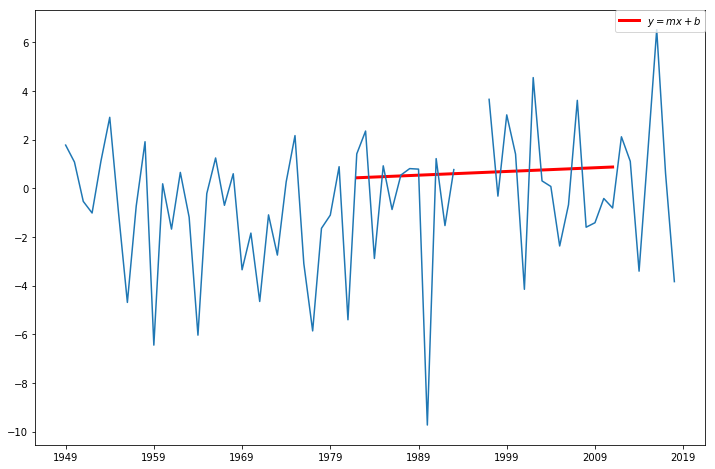

0.015247908573667295

In [36]:
fig = plt.figure(figsize=(12, 8))
plt.plot(anomaly_dec_1981_2010.index, fit_fn(x), c='r',ls='-',lw=3.,label="$y=mx+b$")
plt.plot(anomaly_dec.index, anomaly_dec[:].values)
plt.legend(loc=1, borderaxespad=0.)
plt.show()
m

## Exercice : Exercice sur la librairie Pandas 

## Objectifs: Calculer et tracer les Degrés Jours pour la station de montréal. 

1- Ouvrir et lire le fichier "MONTREAL_tasmoy_1948_2017.txt"

2- Définir un index Datetime sachant que les données couvrent la période entre le 01 janvier 1948 et le 31 décembre 2017 

3- Écrire une fonction DG0 qui calcule le nombre de Degrés jours par an

4- Calculer pour chaque année les températures moyenne, minimale et maximale ainsi que le nombre de dégrés jours

5- Visualiser l'indice 


### Corrigé de l'exercice:

1- Ouvrir et lire le fichier "MONTREAL_tasmoy_1948_2017.txt"

In [37]:
import numpy as np
with open('./data/MONTREAL_tasmoy_1948_2017.txt', 'r') as file:
     rows = file.read()
data_EC_Montreal = [float(row) for row in rows.split()]  

2- Définir un index Datetime sachant que les données couvrent la période entre le 01 janvier 1948 et le 31 décembre 2017 

In [38]:
import pandas as pd
import datetime
from datetime import date
df = pd.DataFrame()

start = date(1948, 1, 1)
end = date(2017, 12, 31)
delta=(end-start) 
nb_days = delta.days + 1 
rng = pd.date_range(start, periods=nb_days, freq='D')

df['datetime'] = rng
df.index = df['datetime'] 
df['Temperature Montreal'] = data_EC_Montreal

3- Écrire une fonction DG0 qui calcule le nombre de Degrés jours par an

In [39]:
# valeur moyenne de l'intensite de precipitation pour les jours humides (PR sup a 1mm) (moins de 20 % de valeurs manquantes)
def DG0(S):  
     ind_DGO=[]
     ind_DGO = sum(x for x in S if x >= 0)
     return ind_DGO  

4- Appliquer cette fonction sur les données de notre Dataframe 

In [40]:
resamp = df.resample('AS')
dataset = resamp.agg([np.mean, np.min, np.max, DG0])
dataset.head()

Temperature Montreal                    
                           mean  amin  amax     DG0
datetime                                           
1948-01-01             7.233880 -23.4  27.8  3506.1
1949-01-01             8.047671 -15.0  28.4  3602.9
1950-01-01             6.848767 -23.6  25.9  3318.9
1951-01-01             7.245205 -24.2  25.3  3404.9
1952-01-01             7.855464 -20.0  27.5  3474.2

5- Visualisation de l'indice

In [41]:
dataset.columns = dataset.columns.droplevel(0)

In [42]:
dataset['DG0'].head()

datetime
1948-01-01    3506.1
1949-01-01    3602.9
1950-01-01    3318.9
1951-01-01    3404.9
1952-01-01    3474.2
Freq: AS-JAN, Name: DG0, dtype: float64

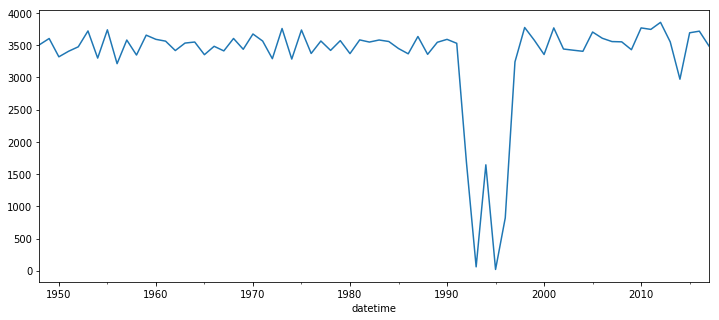

In [43]:
import matplotlib.pyplot as plt
dataset['DG0'].plot(figsize=(12,5))
plt.show()

In [44]:
# valeur moyenne de l'intensite de precipitation pour les jours humides (PR sup a 1mm) (moins de 20 % de valeurs manquantes)
def DG0bis(S):  
     ind_DGObis=[]      
     S_no_nan = S[~np.isnan(S)]
     N = len(S)
     N2 = len(S_no_nan)
     if ((N2/N) < 0.8): 
         ind_DGObis = np.empty(1)
         ind_DGObis = np.nan
     else:       
         ind_DGObis = sum(x for x in S if x >= 0)
     return ind_DGObis 

In [45]:
dataset = resamp.agg([np.mean, np.min, np.max, DG0, DG0bis])
dataset.head()

Temperature Montreal                            
                           mean  amin  amax     DG0  DG0bis
datetime                                                   
1948-01-01             7.233880 -23.4  27.8  3506.1  3506.1
1949-01-01             8.047671 -15.0  28.4  3602.9  3602.9
1950-01-01             6.848767 -23.6  25.9  3318.9  3318.9
1951-01-01             7.245205 -24.2  25.3  3404.9  3404.9
1952-01-01             7.855464 -20.0  27.5  3474.2  3474.2

In [46]:
dataset.columns = dataset.columns.droplevel(0)

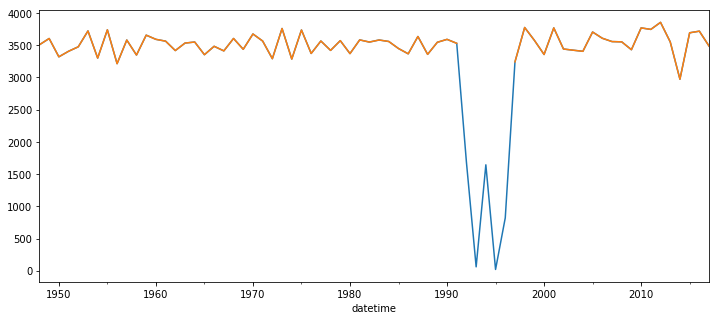

In [47]:
dataset['DG0'].plot(figsize=(12,5))
dataset['DG0bis'].plot(figsize=(12,5))
plt.show()

### Bonus Code pour calculer une tendance avec le test de Mann-Kendall

In [48]:
import numpy as np  
from scipy.stats import norm, mstats

def mk_test(x, alpha = 0.05):  
    """   
    Input:
        x:   a vector of data
        alpha: significance level (0.05 default)

    Output:
        trend: tells the trend (increasing, decreasing or no trend)
        h: True (if trend is present) or False (if trend is absence)
        p: p value of the significance test
        z: normalized test statistics 

    Examples
    --------
      >>> x = np.random.rand(100)
      >>> trend,h,p,z = mk_test(x,0.05) 
    """
    x = x[~np.isnan(x)] # remove nan
    n = len(x)

    # calculate S 
    s = 0
    for k in range(n-1):
        for j in range(k+1,n):
            s += np.sign(x[j] - x[k])

    # calculate the unique data
    unique_x = np.unique(x)
    g = len(unique_x)

    # calculate the var(s)
    if n == g: # there is no tie
        var_s = (n*(n-1)*(2*n+5))/18
    else: # there are some ties in data
        tp = np.zeros(unique_x.shape)
        for i in range(len(unique_x)):
            tp[i] = sum(unique_x[i] == x)
        var_s = (n*(n-1)*(2*n+5) + np.sum(tp*(tp-1)*(2*tp+5)))/18

    if s>0:
        z = (s - 1)/np.sqrt(var_s)
    elif s == 0:
            z = 0
    elif s<0:
        z = (s + 1)/np.sqrt(var_s)

    # calculate the p_value
    p = 2*(1-norm.cdf(abs(z))) # two tail test
    h = abs(z) > norm.ppf(1-alpha/2) 

    if (z<0) and h:
        trend = 'decreasing'
    elif (z>0) and h:
        trend = 'increasing'
    else:
        trend = 'no trend'

    return trend, h, p, z

In [49]:
for m in range(1,13):    
    anomaly_to_test = anomaly[anomaly.index.month==m]
    trend = anomaly_to_test['1961':'2010'].values 
    test_trend,h,p,z = mk_test(trend,alpha=0.05)  
    print(test_trend, 'during:', m)  
    print(z, p) 

increasing during: 1
2.6801165294876768 0.0073596534837323535
increasing during: 2
2.637833137638963 0.008343762654839937
increasing during: 3
2.285962897849977 0.02225642921203974
increasing during: 4
2.648469461335779 0.008085715418427952
increasing during: 5
2.4452775726399443 0.014474069768612319
increasing during: 6
2.32468854166044 0.020088620420037007
increasing during: 7
2.2769872075228705 0.022786989546048853
increasing during: 8
2.4551143251364125 0.014083978930375718
increasing during: 9
2.5500137853377893 0.010771865966682226
no trend during: 10
1.9547937308520553 0.0506074214340535
increasing during: 11
2.4036481981691664 0.01623238609318034
increasing during: 12
2.4394264528103853 0.014710596776264406


In [50]:
test_trend,h,p,z = mk_test(trend,alpha=0.05)  
print(test_trend, h)  
print(z, p)  

increasing True
2.4394264528103853 0.014710596776264406
